# Simulating random walks

In [1]:
import numpy as np  # for numerics
import matplotlib.pyplot as plt # to make plots
import seaborn as sns # to make plots more appealing

sns.set(style="darkgrid") # Gray background with white grid
sns.set_context('talk') # Sets default size to the curves and fonts
#display plots next to code
%matplotlib inline 

### Generating a randowm walk

In [2]:
n_flips = 1000 # Number of coin flips
p = 0.5 # Fair coin

# Intialise array to save position of random walker
position = np.zeros(n_flips)

# Loop through
for i in range(1,n_flips):
    # Flip a coin
    coin = np.random.binomial(1, p)
    
    # Updating the position
    if coin == 0:
        step = -1 # Walker moves to the left
    else:
        step = 1 # Walker moves to the right
    
    # Update the position in the array
    position[i] = position[i - 1] + step

### Plotting the trajectory

Text(0, 0.5, 'Position')

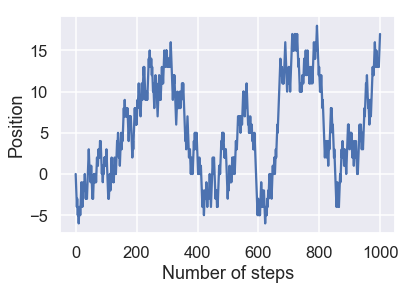

In [3]:
# Define x-axis
steps = np.arange(0, n_flips)

# Plot the random walker
plt.plot(steps, position)

# Label axis
plt.xlabel('Number of steps')
plt.ylabel('Position')

### Doing a bunch of random walks

In [4]:
# Define the number of simulations
n_simulations = 1000

# Initialise array to save all trajectories
position = np.zeros([n_simulations, n_flips])

# Loop through each of the simulations
for i in range(n_simulations):
    # Loop through each of the coin flips
    for j in range(1, n_flips):
        # Flip a coin
        coin = np.random.binomial(1, p)

        # Updating the position
        if coin == 0:
            step = -1 # Walker moves to the left
        else:
            step = 1 # Walker moves to the right

        # Update the position in the array
        position[i, j] = position[i, j - 1] + step
        

### Let's plot all these simulations together

Text(0, 0.5, 'Position')

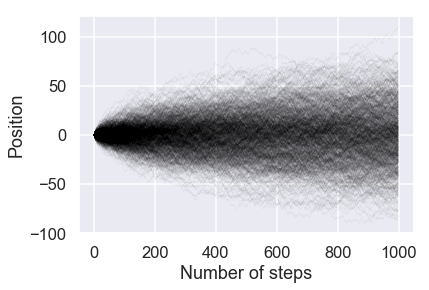

In [5]:
# Loop through each trajectory
for i in range(n_simulations):
    # Plot the trajectory as a thin line
    plt.plot(steps, position[i, :], color='black',
            linewidth=0.5, alpha=0.05)
# Label axis
plt.xlabel('Number of steps')
plt.ylabel('Position')

### Mean displacement must be zero?

Text(0, 0.5, 'Position')

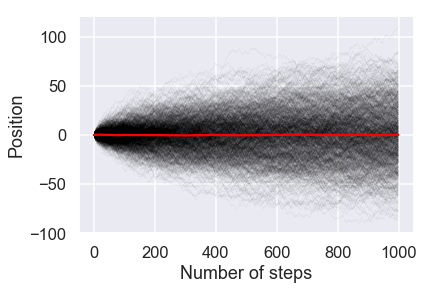

In [6]:
# Computing mean
mean_position = np.mean(position, axis=0)

# Loop through each trajectory
for i in range(n_simulations):
    # Plot the trajectory as a thin line
    plt.plot(steps, position[i, :], color='black',
            linewidth=0.5, alpha=0.05)

# Plot the mean displacement
plt.plot(steps, mean_position, color='red')
# Label axis
plt.xlabel('Number of steps')
plt.ylabel('Position')


### MSD must be linear?

Text(0, 0.5, 'MSD')

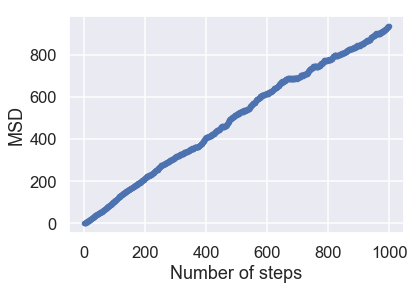

In [8]:
# Computing MSD
msd = np.mean(position**2, axis=0)

# Plot MSD
plt.plot(steps, msd, '.')
# Label axis
plt.xlabel('Number of steps')
plt.ylabel('MSD')

## Diffusion across a synapse

In [9]:
# Define diffusion coefficient
D = 500 # µm^2 / s
L = 30 * (1 / 1000) # in µm

# Set the time steps
dt = 1E-9 # sec (1 nanosecond)

# <L^2> = D<dt>: Step size (on average) at each time step
L_dt = np.sqrt(D * dt)

# Number of steps to get across the synapse
length = int(L / L_dt)

In [44]:
# Initialise variable to keep track of position
position = 0

# Initialise variable to keep track of the number of steps
n_steps = 0

while position < L:
    # Update the number of steps
    n_steps += 1
    
    # Flip a coin
    coin = np.random.binomial(1,0.5)
    
    # Update position of the molecule, by taking care of the reflecting boundary
    if position == 0:
        position += L_dt
    # If heads, walk left   
    elif coin == 1:
        position -= L_dt
    # If heads, walk right
    else:
        position += L_dt
        
# Print the time it took to get absorbed
print('It took {:.2f} µs to get across'.format(n_steps * dt * 1E6))

It took 1.71 µs to get across


### Repeating it for many times

In [45]:
# Define the number of simulations
n_simulations = 1000

# Initialise array to save all trajectories
n_steps_array = np.zeros(n_simulations)



for i in range(n_simulations):
    # Initialise variable to keep track of position
    position = 0

    # Initialise variable to keep track of the number of steps
    n_steps = 0
    while position < L:
        # Update the number of steps
        n_steps += 1

        # Flip a coin
        coin = np.random.binomial(1,0.5)

        # Update position of the molecule, by taking care of the reflecting boundary
        if position == 0:
            position += L_dt
        # If heads, walk left   
        elif coin == 1:
            position -= L_dt
        # If heads, walk right
        else:
            position += L_dt
    # Save the position
    n_steps_array[i] = n_steps * dt * 1E6

### Let's look at the distribution of time to caputre

Text(0, 0.5, 'counts')

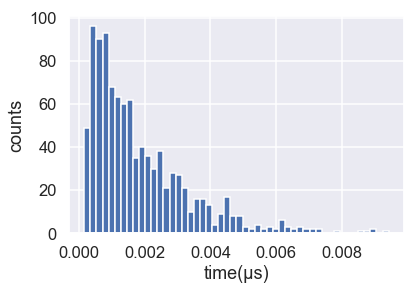

In [46]:
# Plot histograms
plt.hist(n_steps_array * dt * 1E6, bins=50)

# Label axis
plt.xlabel('time(µs)')
plt.ylabel('counts')

In [49]:
expected_time = L ** 2 / D * 1E6
simulation_time = np.mean(n_steps_array * dt * 1E9)
print('The expected time to capture is {:.2f}'.format(expected_time))
print('The mean time to capture in simulation is {:.2f}'.format(simulation_time))

The expected time to capture is 1.80
The mean time to capture in simulation is 1.85


0.0018529520000000002